## フーリエ変換



$y(k) = \frac{NA}{2}(\delta_{k,K} e^{j\theta_0} + \delta_{k,N-K} e^{-j\theta_0})$

- $y(k)$ : (複素)スペクトル
- $|y(k)|$ : 振幅スペクトル
- $|y(k)|^2$ : パワースペクトル <br>

一般に、音声認識は振幅スペクトル・パワースペクトルが特に重要

In [1]:
import wave
import  numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Value')

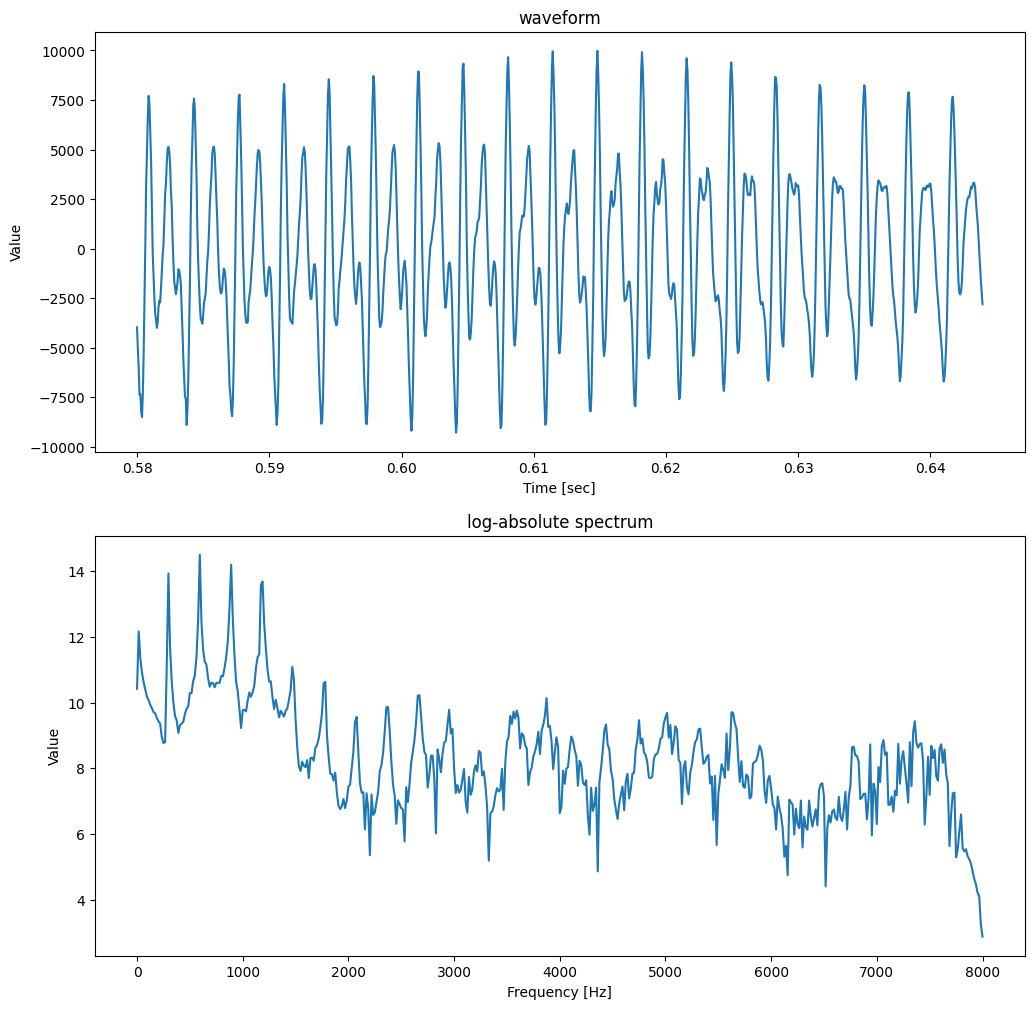

In [31]:
wave_file = '../data/wav/BASIC5000_0001.wav'

target_time = 0.58 
#FFT(高速フーリエ変換)を行う範囲のサンプル数
fft_size = 1024

with wave.open(wave_file, 'rb') as wav:
    sampling_frequency = wav.getframerate()
    #wavデータを読み込む
    waveform = wav.readframes(wav.getnframes())
    #データはバイナリー型なので整数値に変換
    waveform = np.frombuffer(waveform, dtype = np.int16)

target_index = int(target_time * sampling_frequency)
#FFTを行うデータを取り出す
frame = waveform[target_index : target_index + fft_size]
#FFTを実施
sepcturm = np.fft.fft(frame)
#振幅スペクトルをとる
absolute = np.abs(sepcturm)
#振幅スペクトルは左右対称なので左半分を使う
absolute = absolute[:int(fft_size/2) + 1]

log_absolute = np.log(absolute + 1E-7)

time_axis = target_time + np.arange(fft_size) / sampling_frequency
    
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(time_axis, frame)
plt.title("waveform")
plt.xlabel('Time [sec]')
plt.ylabel('Value')

plt.subplot(2, 1, 2)
freq_axis = np.arange(int(fft_size/2)+1) * sampling_frequency / fft_size
plt.plot(freq_axis, log_absolute)

# プロットのタイトルと，横軸と縦軸のラベルを定義
plt.title('log-absolute spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Value')
